In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:

x=data.iloc[:,5].values
y=data.iloc[:,7].values
x.shape, y.shape

((768,), (768,))

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
X_train.shape, y_train.shape


((514,), (514,))

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1))

In [127]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
y_pred=lr.predict(X_test)

In [129]:

from sklearn.metrics import mean_squared_error, r2_score
 

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
 
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
 


RMSE: 11.81
R-squared: 0.00


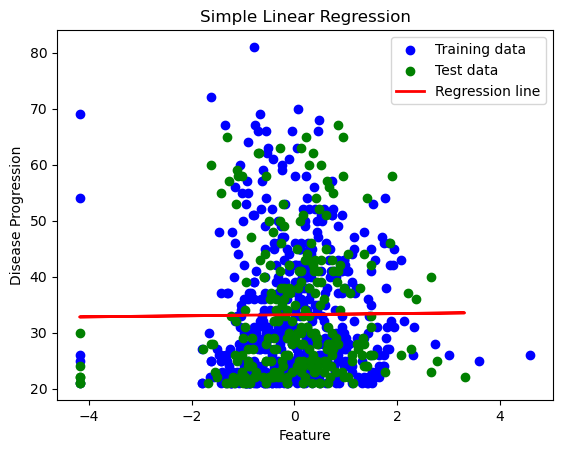

In [130]:
# X_train_plot = X_train.flatten()
# X_test_plot = X_test.flatten()
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()